In [2]:
import numpy as np
from matplotlib import pyplot as plt

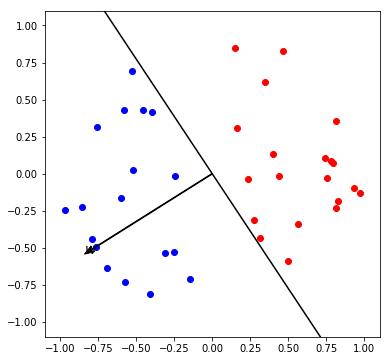

In [3]:
# np.random.seed(2)
size = 50
t = 2*np.pi*np.random.uniform(size=size)
X = np.sqrt(np.random.uniform(size=size)).reshape(-1, 1)*np.array([np.cos(t), np.sin(t)]).T

t0 = 2*np.pi*np.random.uniform()
w0 = np.array([np.cos(t0), np.sin(t0)])
X = X[np.abs(X.dot(w0)) > 0.2]
y = np.sign(X.dot(w0))

def perceptron(X, y, max_iter=1000):
    w = np.zeros_like(X[0])
    ws = [w]
    k = 0
    while np.any(y*X.dot(w) <= 0) and k < max_iter:
        k = k + 1
        i = np.argmax(y*X.dot(w) <= 0)
        w = w + y[i]*X[i]
        ws.append(w)
    if np.all(y*X.dot(w) > 0):
        return w, ws
    else:
        return None, ws
    
w, _ = perceptron(X, y)
w = w/np.linalg.norm(w)

plt.figure(figsize=(6, 6))
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.plot(X[y == -1, 0], X[y == -1, 1], 'ro')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'bo')
u = np.arange(-2, 2, 0.1)
plt.plot([2*w[1], -2*w[1]], [-2*w[0], 2*w[0]], 'k')
plt.annotate('$w$', (w[0], w[1]), fontsize=14)
plt.arrow(0, 0, w[0], w[1], facecolor='k', width=0.005, head_width=3*0.015, overhang=0.33,
          capstyle="projecting", length_includes_head=True, zorder=100)
plt.show()

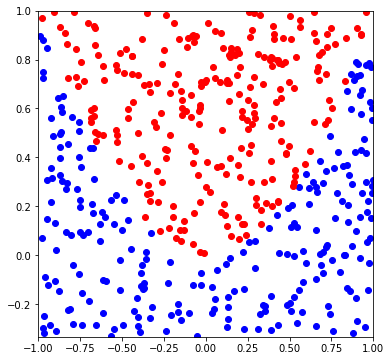

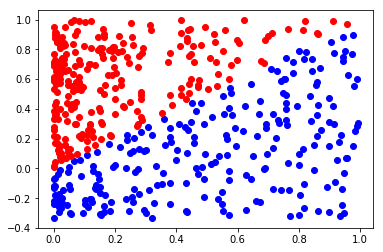

In [4]:
size=500
X = np.array([np.random.uniform(-1, 1, size=size), np.random.uniform(-1/3, 1, size=size)]).T
X = X[np.abs(X[:, 1] - X[:, 0]**2) > 0.01, :]
y = np.sign(X[:, 1] - X[:, 0]**2)

XX = np.hstack([X, np.square(X[:, 0]).reshape(-1, 1)])

w, ws = perceptron(XX, y)

[a,b,c] = w
t = np.arange(-1, 1.01, 0.01)
u = -(a*t + c*t**2)/b
plt.figure(figsize=(6, 6))
plt.xlim(-1, 1)
plt.ylim(-1/3, 1)
# plt.plot(t, u, 'k', linewidth=2)
plt.plot(X[y == -1, 0], X[y == -1, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro')
plt.show()

plt.plot(X[y == -1, 0]**2, X[y == -1, 1], 'bo')
plt.plot(X[y == 1, 0]**2, X[y == 1, 1], 'ro')
plt.show()


In [5]:
size = 300
t = np.arange(-1, 1.01, 0.01)
X = np.array([np.random.uniform(-1, 1, size=size), np.random.uniform(-1, 1, size=size)]).T
Z = X[:, 1] - 4*X[:, 0]**3 + 3*X[:, 0]
I = np.abs(Z) >= 0.01
X = X[I]
Z = Z[I]
y = np.sign(Z)

XX = np.hstack([X, (X[:, 0]**3).reshape(-1, 1)])

w, ws = perceptron(XX, y)

[a,b,c] = w
t = np.arange(-1, 1.01, 0.01)
u = -(a*t + c*t**3)/b
plt.figure(figsize=(6, 6))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
# plt.plot(t, u, 'k', linewidth=2)
plt.plot(X[y == -1, 0], X[y == -1, 1], 'bo')
plt.plot(X[y == 1, 0], X[y == 1, 1], 'ro')
plt.show()

TypeError: 'NoneType' object is not iterable

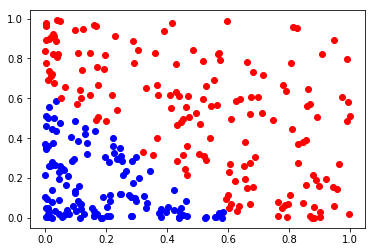

In [6]:
size = 300
t = np.arange(-1, 1.01, 0.01)
X = np.array([np.random.uniform(-1, 1, size=size), np.random.uniform(-1, 1, size=size)]).T
Z = X[:, 0]**2 + X[:, 1]**2 - 2/np.pi
I = np.abs(Z) >= 0.01
X = X[I]
Z = Z[I]
y = np.sign(Z)
plt.plot(X[y == -1, 0]**2, X[y == -1, 1]**2, 'bo')
plt.plot(X[y == 1, 0]**2, X[y == 1, 1]**2, 'ro')
plt.show()

In [7]:
np.sum(y == 1)

162